<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Visualization in teradataml - ClearScape Analytics</b>
</header>

## Introduction
##### This notebook demonstrates below type plots offered by teradataml DataFrame 
- ##### Simple plot
    - line plot
    - bar plot
    - scatter plot
    - geometry plot
    - correlation plot
    - wiggle plot
    - mesh plot
- ##### Combine multiple plots
    - Composite plot
    - Subplot

Workflow steps:
1. Import the required teradataml modules.
2. Connect to a Vantage system.
3. Data Loading and visualize the data using Plot(). 
5. Cleanup.

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>1. Import the required modules.</b>

In [1]:
# Import.
import os
import getpass

from teradataml import create_context, remove_context, load_example_data, DataFrame, GeoDataFrame, db_drop_table
from teradataml import Axis, Figure, subplots


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>2. Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial'>You will be prompted to enter the host name, username and password.</p>

In [3]:
con = create_context(host=getpass.getpass("Hostname: "), 
                     username=getpass.getpass("Username: "),
                     password=getpass.getpass("Password: "))

Hostname:  ···················
Username:  ·····
Password:  ·····


<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>3. Data Loading and visualize the data using Plot().</b>

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.1 Line Plot</b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Visualize a company's stock price over the period</p>

In [4]:
load_example_data("movavg", "ibm_stock")
df = DataFrame("ibm_stock")
df

id,name,period,stockprice
223,ibm,62/04/05,521.0
345,ibm,62/09/27,340.0
120,ibm,61/11/06,592.0
343,ibm,62/09/25,350.0
57,ibm,61/08/07,494.0
118,ibm,61/11/02,581.0
200,ibm,62/03/05,546.0
80,ibm,61/09/08,541.0
162,ibm,62/01/09,556.0
40,ibm,61/07/13,474.0


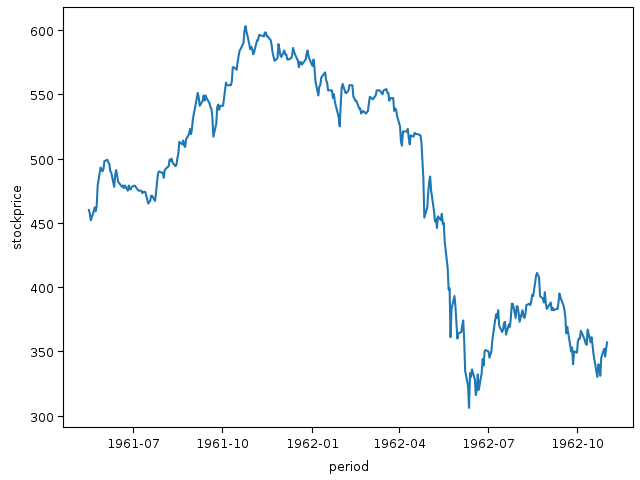

In [6]:
plot = df.plot(x=df.period, y=df.stockprice)
plot.show()

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.2 Bar Plot</b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Visualize the rate of change in inflation for a country over 10 years</p>

In [7]:
load_example_data("uaf","inflation")

In [8]:
df = DataFrame("inflation")

In [9]:
df

countryid,year_recorded,seqno,inflation_rate
1,12/12/31,3,-1.09
1,14/12/31,5,0.16
1,15/12/31,6,-1.5
1,16/12/31,7,1.14
1,18/12/31,9,0.31
1,19/12/31,10,-0.63
299,10/12/31,1,-0.7
299,11/12/31,2,3.3
299,12/12/31,3,5.4
299,13/12/31,4,2.62


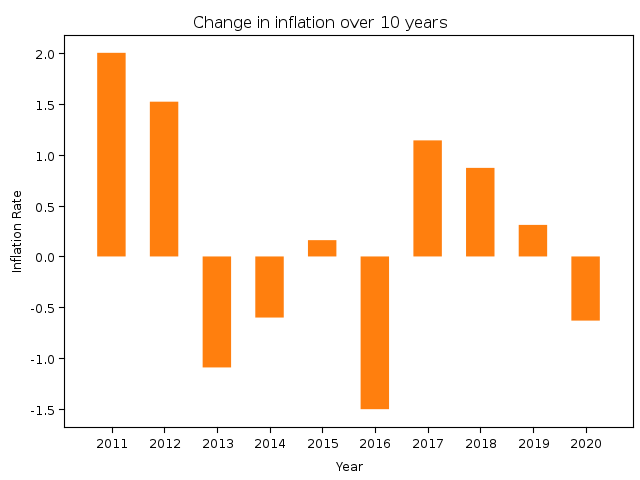

In [11]:
df = df[df.countryid==1]
df.plot(x=df.year_recorded, 
        y=df.inflation_rate, 
        kind="bar",
        title="Change in inflation over 10 years",
        color = "orange",
        xlabel="Year",
        ylabel="Inflation Rate")

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.3 Scatter Plot</b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Visualize the Blood Pressure for different age groups.</p>

In [12]:
load_example_data("uaf","ageandpressure")

In [13]:
df = DataFrame("ageandpressure")
df = df.assign(age=df.A1, blood_pressure=df.B, drop_columns=True)
df

age,blood_pressure
69,175
50,142
56,150
45,135
64,162
53,158
65,162
21,120
59,140
67,170


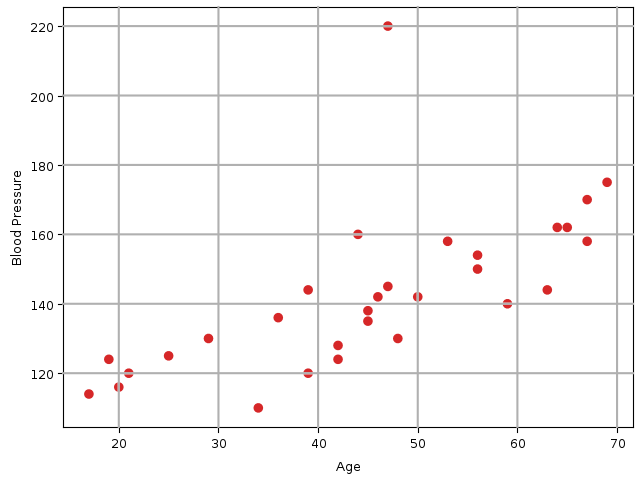

In [14]:
df.plot(x=df.age, 
        y=df.blood_pressure, 
        kind="scatter",
        color="red", 
        grid_color='grey',
        xlabel='Age', 
        ylabel='Blood Pressure',
        grid_linestyle="-",
        marker="o",
        markersize=7)

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.4 Geometry Plot</b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Visualize the population density for all the states across US in year 1990.</p>

- Shapes of US states are generated from Free Blank United States Map in SVG - Resources | Simplemaps.com
- Population data is accessed from Historical Population Change Data (1910-2020) (census.gov)

In [15]:
load_example_data("geodataframe", ["us_population", "us_states_shapes"])

In [16]:
us_population = DataFrame("us_population")
us_population

state_name,location_type,population_year,population
Georgia,State,1930,2908506.0
Maryland,State,1920,1449661.0
Maryland,State,1930,1631526.0
Tennessee,State,1910,2184789.0
Tennessee,State,1930,2616556.0
Alabama,State,1920,2348174.0
Alabama,State,1930,2646248.0
Alabama,State,1940,2832961.0
Tennessee,State,1920,2337885.0
Maryland,State,1910,1295346.0


In [17]:
us_states_shapes = GeoDataFrame("us_states_shapes")
us_states_shapes

id,state_name,state_shape
NM,New Mexico,"POLYGON ((472.45213 324.75551,"
HI,Hawaii,"POLYGON ((416.34965 514.99923,"
KY,Kentucky,"POLYGON ((693.17367 317.18459,"
NJ,New Jersey,"POLYGON ((916.80709 207.30914,"
ND,North Dakota,"POLYGON ((556.50879 73.847349,"
OK,Oklahoma,"POLYGON ((609.50526 322.91131,"
WV,West Virginia,"POLYGON ((836.73002 223.71281,"
WI,Wisconsin,"POLYGON ((705.79187 134.80299,"
VA,Virginia,"POLYGON ((908.75086 270.98255,"
RI,Rhode Island,"POLYGON ((946.50841 152.08022,"


In [18]:
# Join shapes with population and filter only 1990 data.
population_data = us_states_shapes.join(us_population,
                                        on=us_population.state_name == us_states_shapes.state_name,
                                        lsuffix="us",
                                        rsuffix="t2")
population_data = population_data.select(["us_state_name", "state_shape", "population_year", "population"])
df = population_data[population_data.population_year == 1990]
df

C:\Users\pg255042\Anaconda3\envs\teraml\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
Behaviour of the argument(s) "['lsuffix', 'rsuffix']" will change in future.
Use argument(s) "['lprefix', 'rprefix']" instead.
  """


us_state_name,state_shape,population_year,population
Washington,"POLYGON ((192.13384 77.050432,",1990,4866692.0
Iowa,"POLYGON ((661.53109 197.69989,",1990,2776755.0
Maine,"POLYGON ((946.7996 118.39932,9",1990,1227928.0
Tennessee,"POLYGON ((786.2572 300.48973,7",1990,4877185.0
Oklahoma,"POLYGON ((609.50526 322.91131,",1990,3145585.0
Alabama,"POLYGON ((718.31301 344.84758,",1990,4040587.0
New York,"POLYGON ((913.50695 181.78154,",1990,17990455.0
Delaware,"POLYGON ((893.80314 207.69739,",1990,666168.0
Oregon,"POLYGON ((162.2384 162.75717,1",1990,2842321.0
Maryland,"POLYGON ((911.56569 238.27227,",1990,4781468.0


In [20]:
figure = Figure(width=1550, height=860)
# Set heading for Figure.
figure.heading = "Geometry Plot"

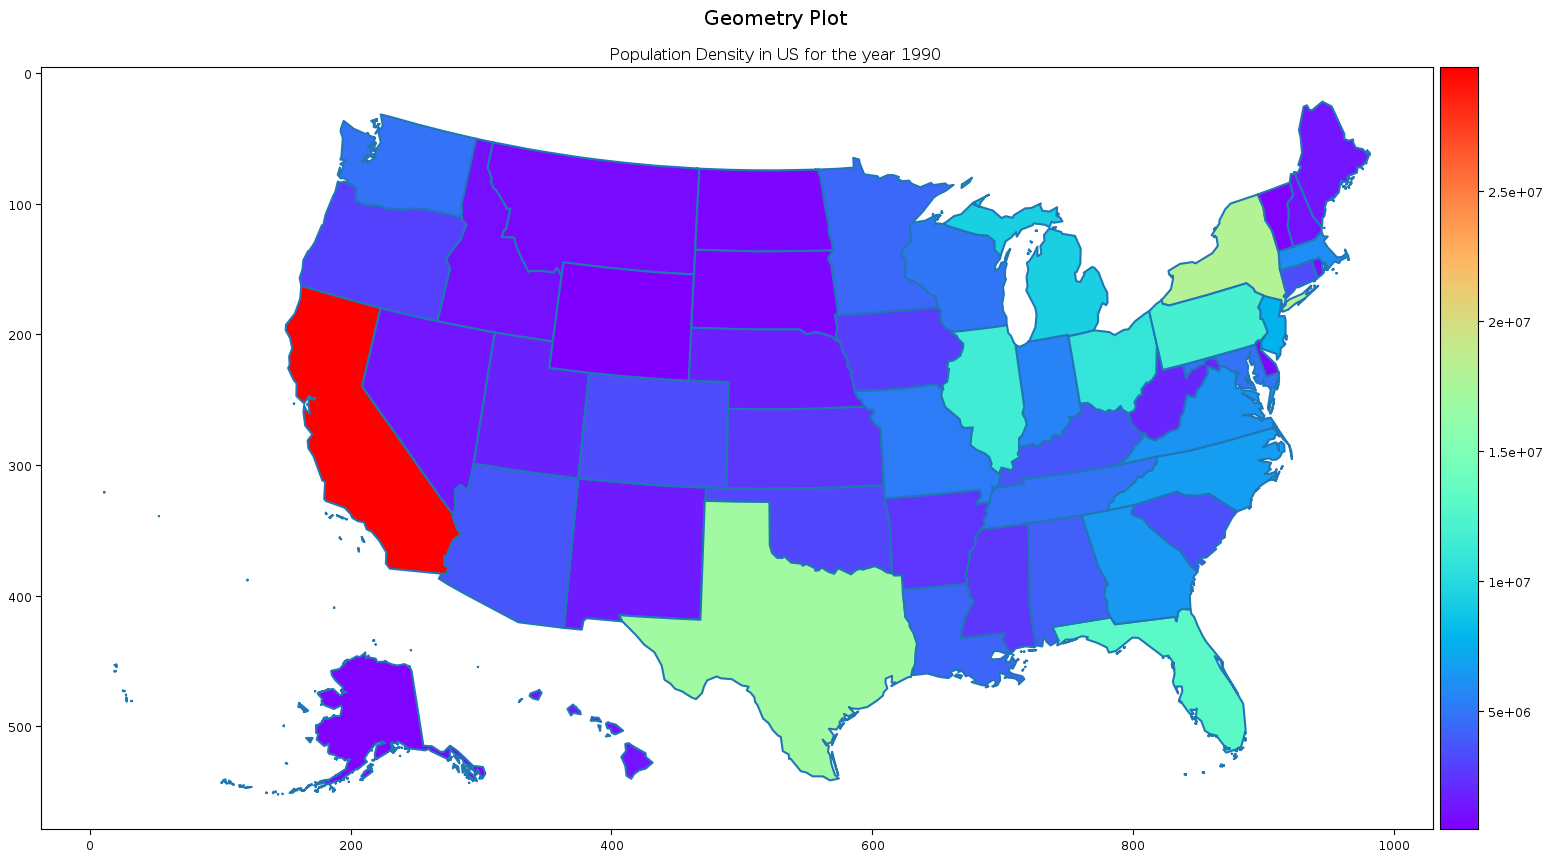

In [21]:
plot_1990 = df.plot(y=(df.population, df.state_shape),
                       cmap='rainbow',
                       figure=figure,
                       reverse_yaxis=True,
                       title="Population Density in US for the year 1990",
                       xlabel="",
                       ylabel="")
plot_1990.show()

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.5 Correlation Plot</b></br>

In [22]:
load_example_data("uaf", ["acf"])

In [23]:
df = DataFrame("acf")
df

id,ROW_I,OUT_v,CONF_OFF_v,CONF_LOW_v,CONF_HI_v
1,2,0.8284986328947288,0.4842547748565381,0.3442438580381907,1.3127534077512668
1,4,0.4815616966610039,0.6532029558519226,-0.17164125919091866,1.1347646525129265
1,5,0.27473741953030045,0.6825597805116725,-0.4078223609813721,0.957297200041973
1,6,0.06483037142946574,0.6918463449908144,-0.6270159735613487,0.7566767164202801
1,8,-0.3107447519882334,0.6945618751490229,-1.0053066271372564,0.3838171231607895
1,9,-0.45436244307300827,0.7062184805200586,-1.1605809235930669,0.2518560374470504
1,7,-0.1343928370124438,0.6923597862702022,-0.8267526232826461,0.5579669492577584
1,3,0.6708578695222375,0.5920913692420781,0.07876650028015941,1.2629492387643155
1,1,0.9416996727690261,0.2907717884191685,0.6509278843498576,1.2324714611881946
1,0,1.0,0.0,1.0,1.0


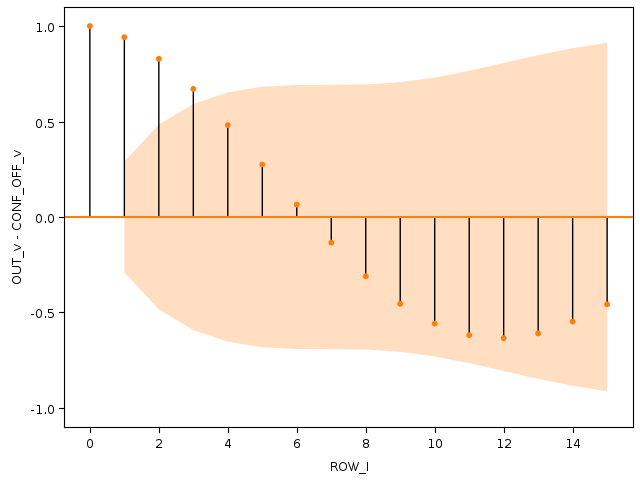

In [24]:
df.plot(x=df.ROW_I, 
        y=(df.OUT_v, df.CONF_OFF_v),
        kind='corr', 
        color="orange")

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.6 Wiggle Plot</b></br>

In [25]:
load_example_data("uaf", ["waveletTable"])

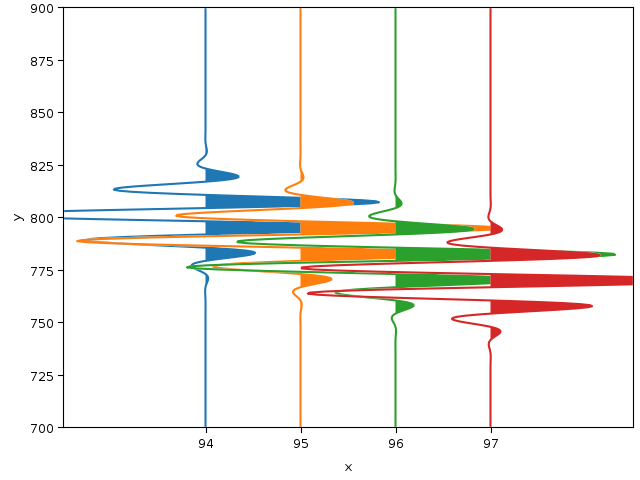

In [26]:
df = DataFrame("waveletTable")
df.plot(x=df.x, y=df.y, scale=df.c, kind='wiggle')

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.7 Mesh Plot</b></br>

In [27]:
load_example_data("uaf", ["waveletTable"])

In [28]:
df = DataFrame("waveletTable")
df

ID,x,t,y,c
a,94.0,800.0,701.0,-2.0343998139337458e-22
a,94.0,800.0,702.0,-4.2175505490803137e-22
a,94.0,800.0,702.5,-5.192715281969965e-22
a,94.0,800.0,703.0,-5.182389339674247e-22
a,94.0,800.0,704.0,5.4739492475282535e-22
a,94.0,800.0,704.5,2.389176888685273e-21
a,94.0,800.0,703.5,-2.592409172954413e-22
a,94.0,800.0,701.5,-3.0517800545518237e-22
a,94.0,800.0,700.5,-1.2661454338930013e-22
a,94.0,800.0,700.0,-7.378603261593931e-23


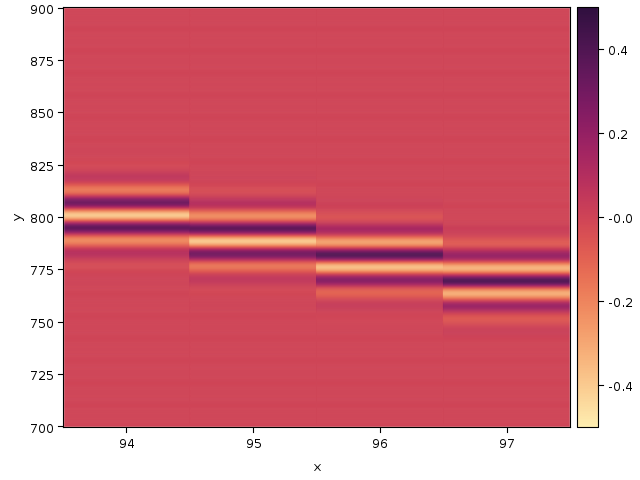

In [29]:
plot = df.plot(x=df.x,
               y=df.y,
               scale=df.c,
               kind='mesh',
               cmap='matter',
               vmin=-0.5,
               vmax=0.5)
plot.show()

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.8 Combining multiple Plots - Composite plot </b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Compare domestic passengers vs international passengers for an airline company.</p>

In [30]:
load_example_data("uaf", ["us_air_pass"])

In [31]:
df = DataFrame("us_air_pass")
df

TD_TIMECODE,id,idx,international,domestic
17/03/01,0,2,9.0,63.96
17/07/01,0,6,11.24,68.58
17/12/01,0,11,8.96,61.37
17/06/01,0,5,10.26,66.75
18/03/01,0,14,9.65,66.64
17/09/01,0,8,7.77,57.15
17/10/01,0,9,8.08,64.63
17/11/01,0,10,7.72,61.91
18/02/01,0,13,7.64,54.08
17/04/01,0,3,9.16,61.1


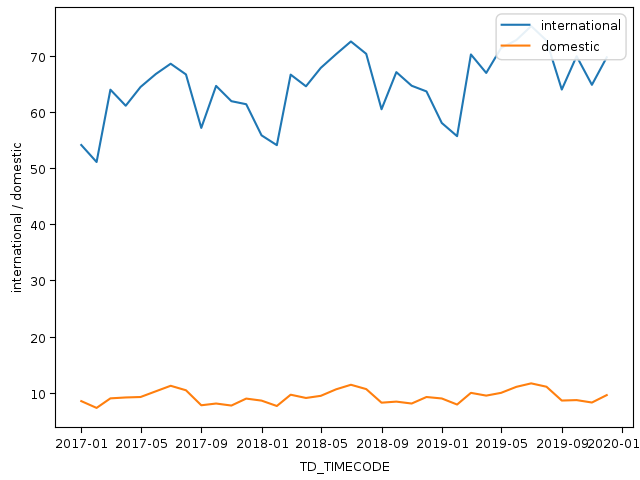

In [32]:
df.plot(x=df.TD_TIMECODE, y=[df.international, df.domestic])

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.9 Combining multiple Plots - SubPlot </b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Change in population density in US across four decades.</p>

In [45]:
from teradataml import subplots
fig, axis = subplots(2, 2)
fig.height = 1200
fig.heading = "Change in population density in US across four decades."
axis

[AxesSubplot(position=(1, 1), span=(1, 1)),
 AxesSubplot(position=(1, 2), span=(1, 1)),
 AxesSubplot(position=(2, 1), span=(1, 1)),
 AxesSubplot(position=(2, 2), span=(1, 1))]

In [46]:
us_population = DataFrame("us_population")
us_population

state_name,location_type,population_year,population
Maryland,State,1930,1631526.0
Alabama,State,1930,2646248.0
Alabama,State,1940,2832961.0
Tennessee,State,1910,2184789.0
Tennessee,State,1930,2616556.0
Georgia,State,1910,2609121.0
Georgia,State,1920,2895832.0
Georgia,State,1930,2908506.0
Tennessee,State,1920,2337885.0
Alabama,State,1920,2348174.0


In [47]:
us_states_shapes = GeoDataFrame("us_states_shapes")
us_states_shapes

id,state_name,state_shape
KY,Kentucky,"POLYGON ((693.17367 317.18459,"
GA,Georgia,"POLYGON ((845.85395 396.09691,"
NM,New Mexico,"POLYGON ((472.45213 324.75551,"
OK,Oklahoma,"POLYGON ((609.50526 322.91131,"
WI,Wisconsin,"POLYGON ((705.79187 134.80299,"
NJ,New Jersey,"POLYGON ((916.80709 207.30914,"
VA,Virginia,"POLYGON ((908.75086 270.98255,"
ND,North Dakota,"POLYGON ((556.50879 73.847349,"
WV,West Virginia,"POLYGON ((836.73002 223.71281,"
MA,Massachusetts,"POLYGON ((956.31178 153.05085,"


In [48]:
# Join shapes with population and filter only 1990 data.
population_data = us_states_shapes.join(us_population,
                                        on=us_population.state_name == us_states_shapes.state_name,
                                        lsuffix="us",
                                        rsuffix="t2")
population_data = population_data.select(["us_state_name", "state_shape", "population_year", "population"])

C:\Users\pg255042\AppData\Local\Temp\ipykernel_30484\3119533925.py:2: DeprecationWarning: 
Behaviour of the argument(s) "['lsuffix', 'rsuffix']" will change in future.
Use argument(s) "['lprefix', 'rprefix']" instead.
  population_data = us_states_shapes.join(us_population,


In [49]:
# Find out the minimum and maximum population. This helps in coloring the plot.
population_data.assign(min_population=population_data.population.min(), max_population=population_data.population.max(), drop_columns=True)

max_population,min_population
39538223.0,55036.0


In [50]:
population_data_2020 = population_data[population_data.population_year == 2020]
population_data_2010 = population_data[population_data.population_year == 2010]
population_data_2000 = population_data[population_data.population_year == 2000]
population_data_1990 = population_data[population_data.population_year == 1990]

# Generate subplot.
# Plot population_data_1990 on first axis.
plot_1990 = population_data_1990.plot(y=(population_data_1990.population, population_data_1990.state_shape),
                                      cmap='rainbow',
                                      figure=fig,
                                      ax=axis[0],
                                      reverse_yaxis=True,
                                      vmin=55036.0,
                                      vmax=39538223.0,
                                      title="US 1990 Population",
                                      xlabel="",
                                      ylabel="")

# Plot population_data_2000 on second axis.
plot_2000 = population_data_2000.plot(y=(population_data_2000.population, population_data_2000.state_shape),
                                      cmap='rainbow',
                                      figure=fig,
                                      ax=axis[1],
                                      reverse_yaxis=True,
                                      vmin=55036.0,
                                      vmax=39538223.0,
                                      title="US 2000 Population",
                                      xlabel="",
                                      ylabel="")

# Plot population_data_2010 on third axis.
plot_2010 = population_data_2010.plot(x=population_data_2010.population_year,
                                      y=(population_data_2010.population, population_data_2010.state_shape),
                                      cmap='rainbow',
                                      figure=fig,
                                      ax=axis[2],
                                      reverse_yaxis=True,
                                      vmin=55036.0,
                                      vmax=39538223.0,
                                      title="US 2010 Population",
                                      xlabel="",
                                      ylabel="",
                                      xtick_values_format="")

# Plot population_data_2020 on fourth axis.
plot = population_data_2020.plot(x=population_data_2020.population_year,
                                 y=(population_data_2020.population, population_data_2020.state_shape),
                                 cmap='rainbow',
                                 figure=fig,
                                 ax=axis[3],
                                 reverse_yaxis=True,
                                 vmin=55036.0,
                                 vmax=39538223.0,
                                 title="US 2020 Population",
                                 xlabel="",
                                 ylabel="",
                                 xtick_values_format="")

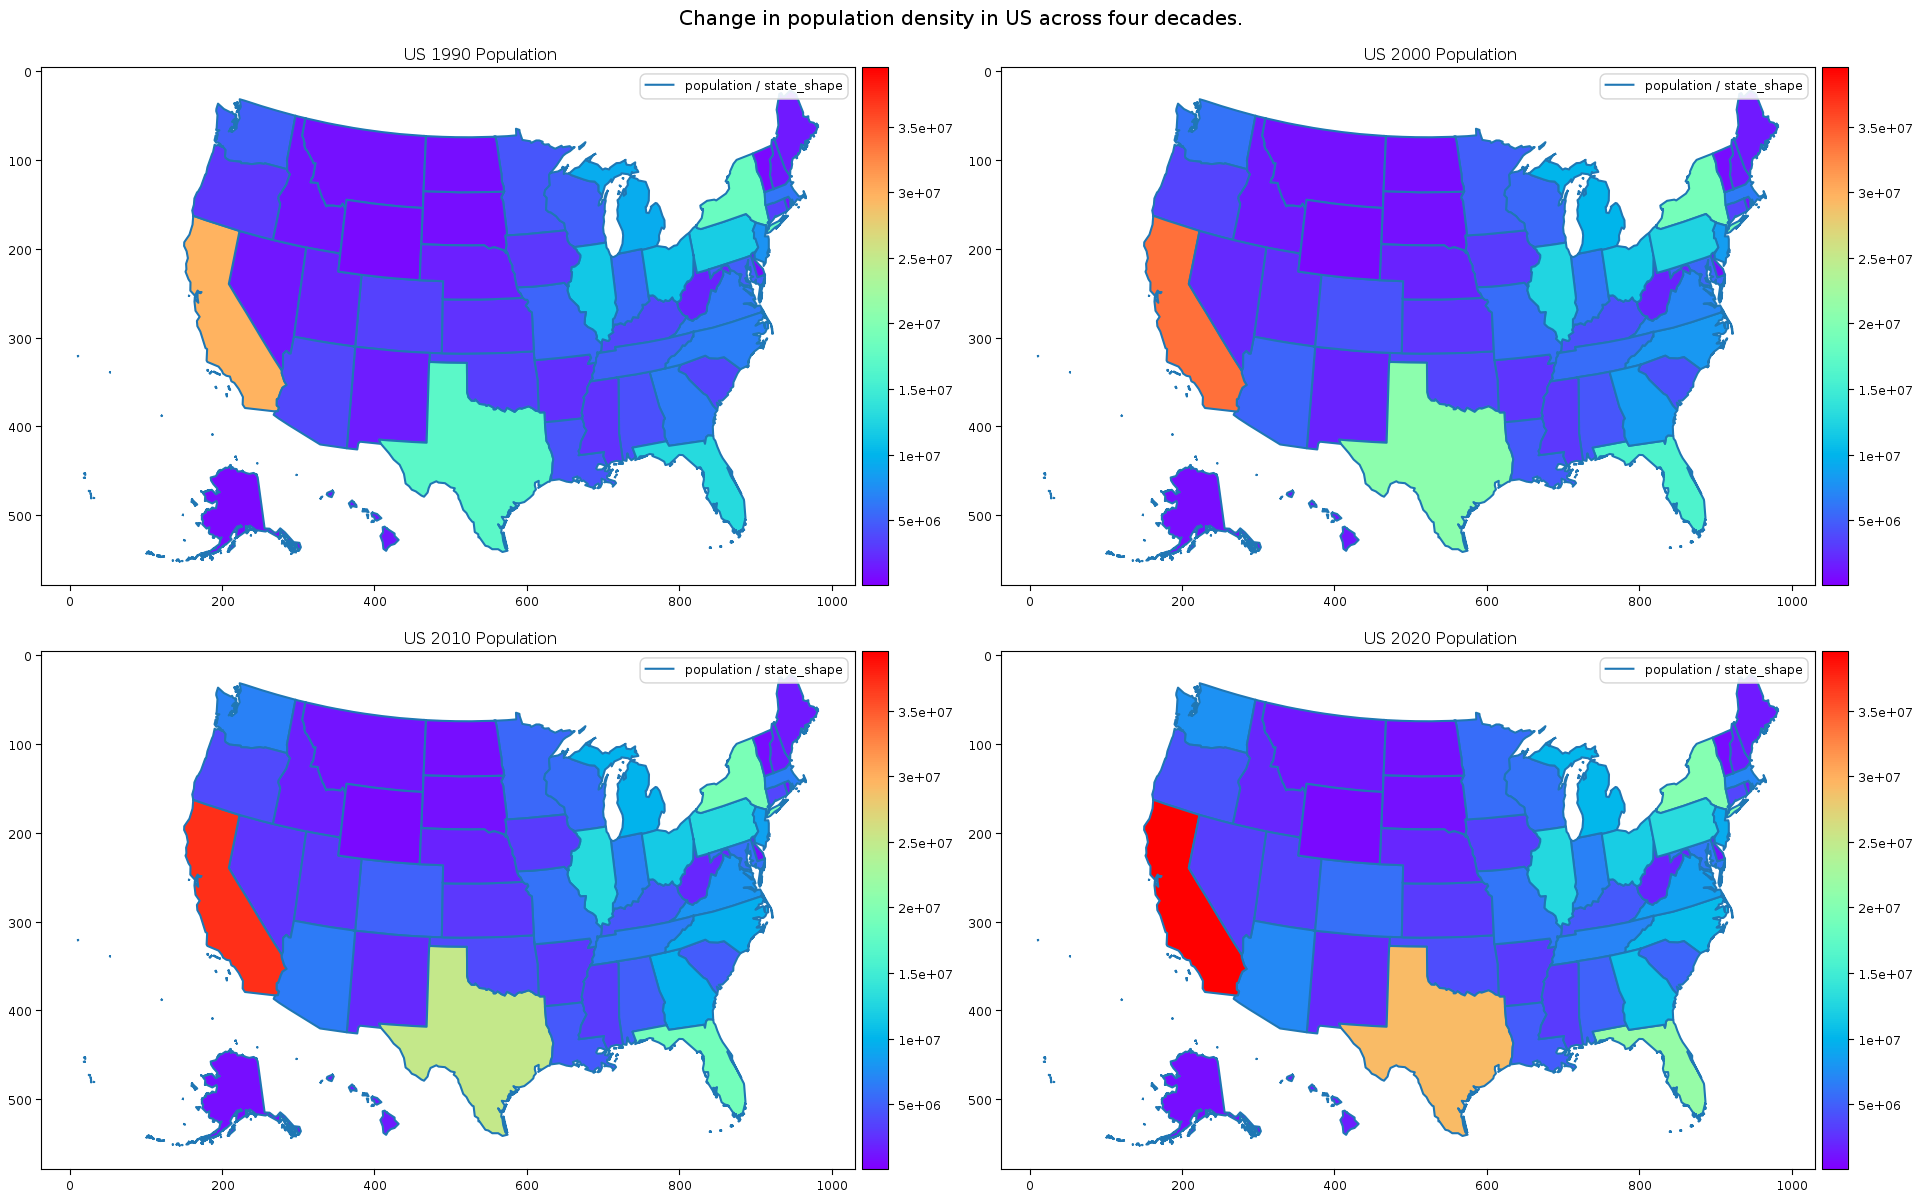

In [51]:
plot.show()

<b style = 'font-size:22px;font-family:Arial;color:#E37C4D'>3.10 Combining multiple Plots - SubPlot </b></br>
<p style = 'font-size:17px;font-family:Arial;font-weight:bold;text-align: center;'>Plot the company performance across different quarters and years</p>

In [35]:
df = DataFrame("finance_data3")
df

id,period,expenditure,income,investment
3,1980q3,1722,1976,603
3,1981q1,2145,2521,833
3,1981q2,2164,2545,860
3,1981q3,2206,2580,870
3,1982q1,2235,2639,801
3,1982q2,2237,2618,824
3,1981q4,2225,2620,830
3,1980q4,1752,2018,619
3,1980q2,1685,1943,597
3,1980q1,1650,1910,611


In [36]:
from teradatasqlalchemy import DATE
from teradataml.dataframe.sql import case_when
c = case_when((df.period.right(2).expression == 'q1', df.period.left(4).expression+"-01-01"), 
              (df.period.right(2).expression == 'q2', df.period.left(4).expression+"-04-01"),
              (df.period.right(2).expression == 'q3', df.period.left(4).expression+"-07-01"),
              (df.period.right(2).expression == 'q4', df.period.left(4).expression+"-10-01"))
df.assign(investment_date=c.cast(DATE()))

id,period,expenditure,income,investment,investment_date
3,1980q3,1722,1976,603,80/07/01
3,1981q1,2145,2521,833,81/01/01
3,1981q2,2164,2545,860,81/04/01
3,1981q3,2206,2580,870,81/07/01
3,1982q1,2235,2639,801,82/01/01
3,1982q2,2237,2618,824,82/04/01
3,1981q4,2225,2620,830,81/10/01
3,1980q4,1752,2018,619,80/10/01
3,1980q2,1685,1943,597,80/04/01
3,1980q1,1650,1910,611,80/01/01


In [37]:
from sqlalchemy import func
df=df.assign(investment_date=c.cast(DATE()))

In [39]:
df_1980 = df[(df.id==3) & (func.to_char(df.investment_date.expression, 'YYYY') == '1980')].select(["investment_date", "investment", "expenditure", "income"])
df_1981 = df[(df.id==3) & (func.to_char(df.investment_date.expression, 'YYYY') == '1981')].select(["investment_date", "investment", "expenditure", "income"])
df_1982 = df[(df.id==3) & (func.to_char(df.investment_date.expression, 'YYYY') == '1982')].select(["investment_date", "investment", "expenditure", "income"])
df_all = df[(df.id==3) & ((func.to_char(df.investment_date.expression, 'YYYY') == '1980') | 
                         (func.to_char(df.investment_date.expression, 'YYYY') == '1981') | 
                         (func.to_char(df.investment_date.expression, 'YYYY') == '1982'))].select(["investment_date", "investment", "expenditure", "income"])

In [40]:
fig, axes = subplots(grid={(1, 1): (1,1), (1, 2): (1, 1), (1, 3): (1, 1), (2, 1): (1, 3)})

In [41]:
axes

[AxesSubplot(position=(1, 1), span=(1, 1)),
 AxesSubplot(position=(1, 2), span=(1, 1)),
 AxesSubplot(position=(1, 3), span=(1, 1)),
 AxesSubplot(position=(2, 1), span=(1, 3))]

In [42]:
# Plot 1980 data at first Axis.
plot = df_1980.plot(x=df_1980.investment_date, 
                    y=[df_1980.investment, df_1980.expenditure, df_1980.income],
                    kind="bar",
                    title="Financial overview of the company for all quarters in year 1980",
                    legend=["Investment", "Expenditure", "Income"],
                    figure=fig,
                    ax=axes[0])

# Plot 1981 data at second Axis.
plot = df_1981.plot(x=df_1981.investment_date, 
                    y=[df_1981.investment, df_1981.expenditure, df_1981.income],
                    kind="bar",
                    title="Financial overview of the company for all quarters in year 1981",
                    legend=["Investment", "Expenditure", "Income"],
                    figure=fig,
                    ax=axes[1])

# Plot 1982 data at third Axis.
plot = df_1982.plot(x=df_1982.investment_date, 
                    y=[df_1982.investment, df_1982.expenditure, df_1982.income],
                       kind="bar",
                       title="Financial overview of the company for all quarters in year 1982",
                       legend=["Investment", "Expenditure", "Income"],
                       figure=fig,
                       ax=axes[2])

# Plot all 3 years of data at third Axis.
plot = df_all.plot(x=df_all.investment_date, 
                   y=[df_all.investment, df_all.expenditure, df_all.income],
                   kind="line",
                   title="Financial overview of the company for all 3 years",
                   legend=["Investment", "Expenditure", "Income"],
                   figure=fig,
                   ax=axes[3])

In [43]:
plot.figure.heading = "Financial overview of a company"

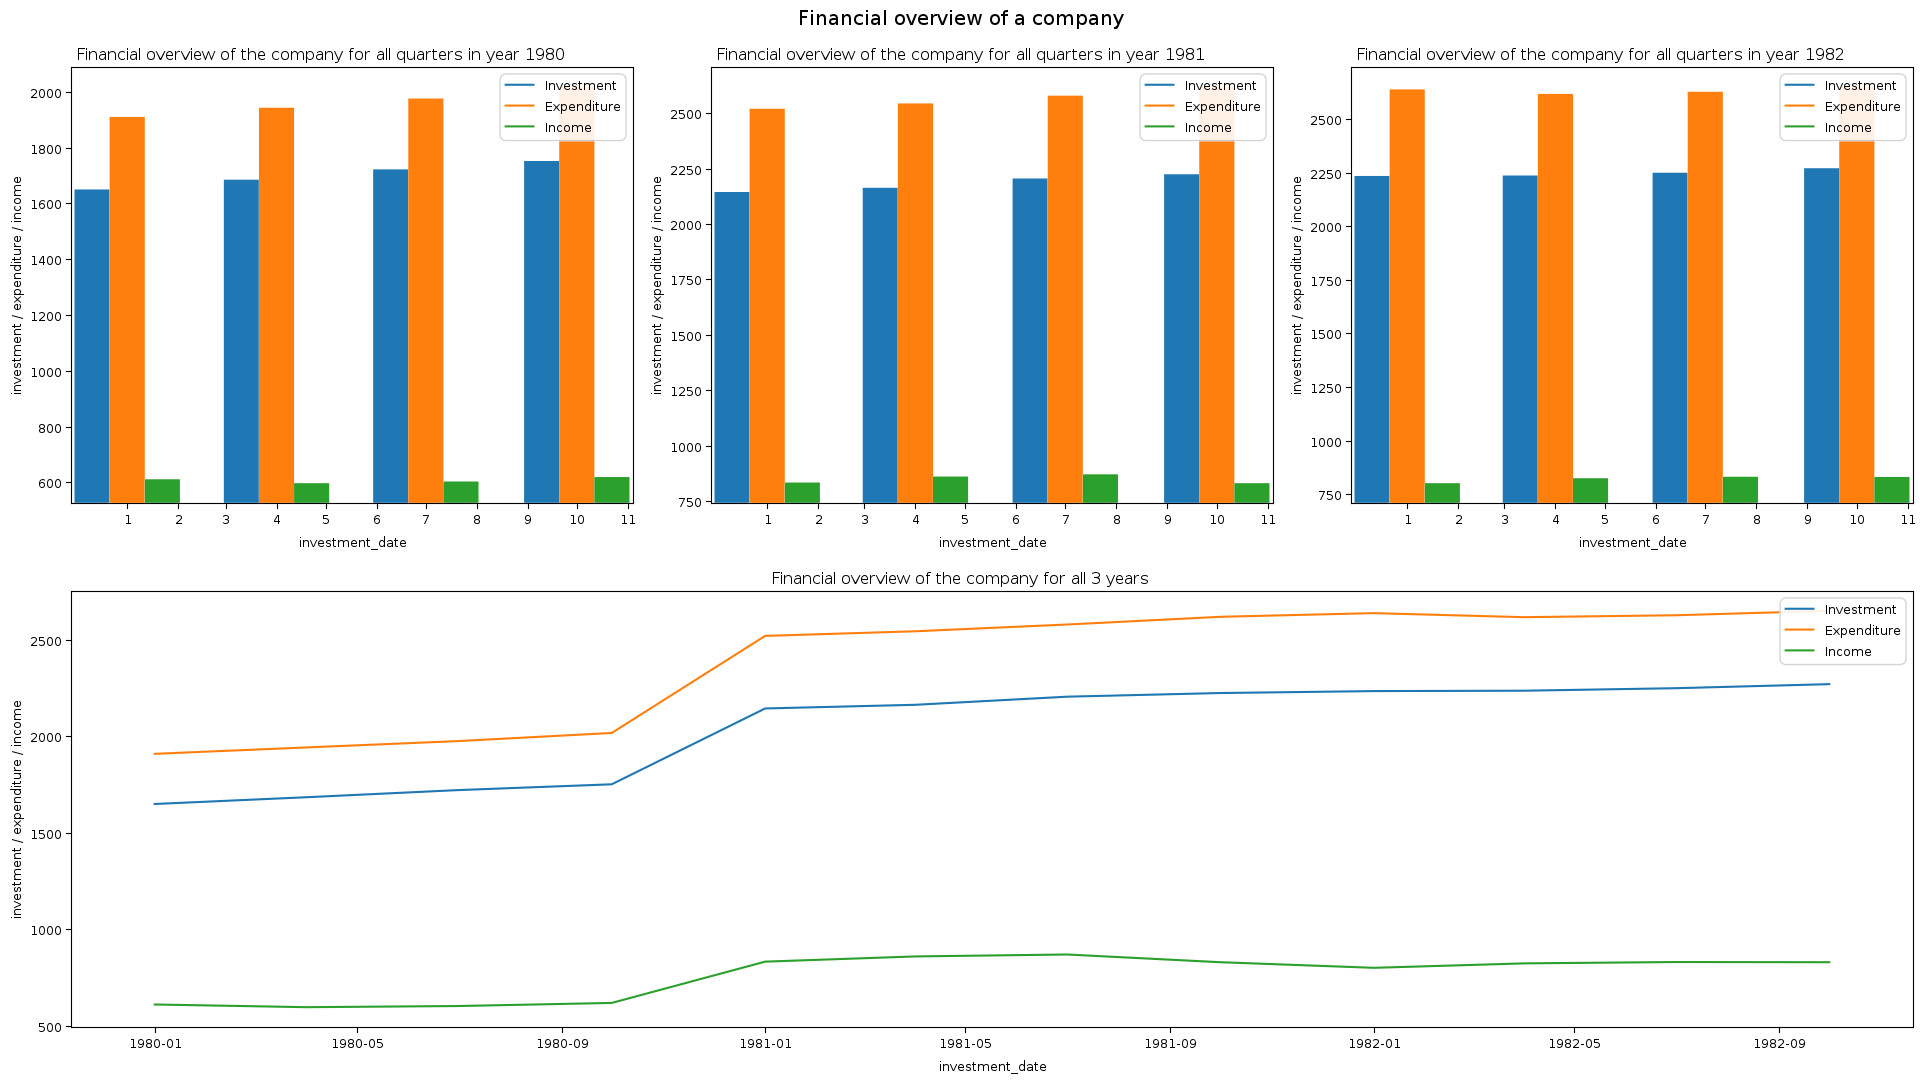

In [44]:
plot.show()

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>4. Cleanup</b>

In [52]:
# Drop the table. 
db_drop_table(table_name='ibm_stock')
db_drop_table(table_name='inflation')
db_drop_table(table_name='ageandpressure')
db_drop_table(table_name='us_population')
db_drop_table(table_name='us_states_shapes')
db_drop_table(table_name='acf')
db_drop_table(table_name='waveletTable')
db_drop_table(table_name='finance_data3')
db_drop_table(table_name='us_air_pass')

True

In [53]:
remove_context()

True